### Testing Wind Speed -> Wind Power conversion ###

Based on Hannah's S2S4E and CLEARHEADS scripts. First load bias corrected dcppA-hindcast data from HadGEM3-GC31-MM, then use power law to convert from 10m wind speeds to 100m wind speeds (for now), and then convert into wind power and compare to ERA5.

In [1]:
# cell magic
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Load local modules
import os
import sys
import glob
import importlib

# Import external modules
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
# Import the functions
sys.path.append("/home/users/benhutch/unseen_functions")

import functions_demand as func_dm

import bias_functions as bias_func

import load_wind_functions as lw_func

In [3]:
# import dictionaries
sys.path.append("/home/users/benhutch/unseen_functions")

import unseen_dictionaries as udicts

In [4]:
# set up the global variables - loading for a single country
first_year = 1960
last_year = 1960
first_month = 1
last_month = 1
init_years = np.arange(1960, 2018 + 1, 1)
variable = "sfcWind"
lead_time = 1
obs_variable = "si100_bc" # use bc 100m winds for obs
country = "United Kingdom"
country_name = "United_Kingdom"

# Set up the path to the obs
# observations from ERA5 containing 10m wind speeds (si10)
# and bias corrected 100m wind speeds (si100_bc)
# obs_path = "/gws/nopw/j04/canari/users/benhutch/ERA5/ERA5_wind_daily_1960_2020.nc"

# Smaller obs path for testing
obs_path = "/gws/nopw/j04/canari/users/benhutch/ERA5/ERA5_wind_daily_1960_1965.nc"

# Set up the path to the test file
test_file = "/badc/cmip6/data/CMIP6/DCPP/MOHC/HadGEM3-GC31-MM/dcppA-hindcast/s1960-r1i1p1f2/day/sfcWind/gn/files/d20200417/sfcWind_day_HadGEM3-GC31-MM_dcppA-hindcast_s1960-r1i1p1f2_gn_19601101-19601230.nc"

In [5]:
%%time
# Load the observations
test_model_ds = xr.open_dataset(test_file)

# Load and regrid the observations
obs_ds = bias_func.load_and_rg_obs(
    model_ds=test_model_ds,
    obs_variable=obs_variable,
    obs_path=obs_path,
    init_years=init_years,
    lead_time=lead_time,
    rg_algo="bilinear",
    grid_bounds=[-180.0, 180.0, -90.0, 90.0],
    periodic=True,
    parallel=False,
)

CPU times: user 4.22 s, sys: 84.6 ms, total: 4.3 s
Wall time: 7.04 s


In [6]:
%%time

# Select the gridbox
obs_ds = bias_func.select_gridbox(
    ds=obs_ds,
    grid=udicts.eu_grid_constrained,
    calc_mean=False,
)

CPU times: user 3.74 ms, sys: 0 ns, total: 3.74 ms
Wall time: 3.65 ms


In [7]:
%%time

# Apply the country mask to the obs data
obs_ds = lw_func.apply_country_mask(
    ds=obs_ds,
    country=country,
    lon_name="lon",
    lat_name="lat",
)

Found the country!
Pre-country mask
<xarray.DataArray (y: 324, x: 432)>
dask.array<getitem, shape=(324, 432), dtype=float64, chunksize=(324, 432), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 1960-11-01
    lon      (x) float64 -179.6 -178.8 -177.9 -177.1 ... 177.1 177.9 178.7 179.6
    lat      (y) float64 -89.72 -89.17 -88.61 -88.06 ... 88.06 88.61 89.17 89.72
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear
[-179.58333336 -178.75000007 -177.91666678 -177.0833335  -176.25000021
 -175.41666693 -174.58333364 -173.75000035 -172.91666707 -172.08333378
 -171.2500005  -170.41666721 -169.58333392 -168.75000064 -167.91666735
 -167.08333406 -166.25000078 -165.41666749 -164.58333421 -163.75000092
 -162.91666763 -162.08333435 -161.25000106 -160.41666778 -159.58333449
 -158.7500012  -157.91666792 -157.08333463 -156.25000134 -155.41666806
 -154.58333477 -153.75000149 -152.9166682  -152.08333491 -151.25000163
 -150.41666834 -149.58333506 -148.75000

In [8]:
obs_ds

<xarray.DataArray (time: 1887, y: 324, x: 432)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1960-11-01 1960-11-02 ... 1965-12-31
    lon      (x) float64 -179.6 -178.8 -177.9 -177.1 ... 177.1 177.9 178.7 179.6
    lat      (y) float64 -89.72 -89.17 -88.61 -88.06 ... 88.06 88.61 89.17 89.72
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

In [9]:
obs_ds

<xarray.DataArray (time: 1887, y: 324, x: 432)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 1960-11-01 1960-11-02 ... 1965-12-31
    lon      (x) float64 -179.6 -178.8 -177.9 -177.1 ... 177.1 177.9 178.7 179.6
    lat      (y) float64 -89.72 -89.17 -88.61 -88.06 ... 88.06 88.61 89.17 89.72
Dimensions without coordinates: y, x
Attributes:
    regrid_method:  bilinear

In [10]:
importlib.reload(lw_func)

<module 'load_wind_functions' from '/home/users/benhutch/unseen_functions/load_wind_functions.py'>

In [11]:
%%time

# Test the function for creating the wind power data
cfs = lw_func.create_wind_power_data(
    ds=obs_ds,
    country=country_name,
    ons_ofs="ons", # test onshore for now
    onshore_curve_file="/home/users/benhutch/Hannah_model/power_onshore.csv",
    offshore_curve_file="/home/users/benhutch/Hannah_model/power_offshore.csv",
    installed_capacities_dir="/home/users/benhutch/Hannah_model/installed_capacities/",
    lat_name="lat",
    lon_name="lon",
)

Loading in the installed capacities for onshore wind farms.
Lats and lons are not the same.
Interpolating installed capacities to the same grid as the wind speed data.


/home/users/benhutch/unseen_functions/load_wind_functions.py:792: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  power_curve = pd.read_csv(onshore_curve_file, header=None, sep="  ")


ic_cube: totals / (unknown)                  (latitude: 214; longitude: 304)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
bc_si100_cube: unknown / (unknown)                 (time: 1887; latitude: 324; longitude: 432)
    Dimension coordinates:
        time                             x               -               -
        latitude                         -               x               -
        longitude                        -               -               x
    Attributes:
        regrid_method               'bilinear'
Total MW shape: (214, 304)
Installed capacity: 12.579789 for United_Kingdom
Loading in the onshore power curve.
Power curve:              0         1
0     0.000000  0.000000
1     0.831618  0.005259
2     1.134126  0.005259
3     1.436635  0.007733
4     1.739143  0.009794
..         ...       ...
101   0.397680  0.003082
102   4.275062  0.000000
103   4.67

Creating wind power data: 100%|██████████| 1887/1887 [00:04<00:00, 454.78it/s]


CPU times: user 5.84 s, sys: 2.95 s, total: 8.79 s
Wall time: 8.87 s


In [12]:
cfs

array([0.74866914, 0.82610007, 0.59894853, ..., 0.63649144, 0.60136279,
       0.45535813])

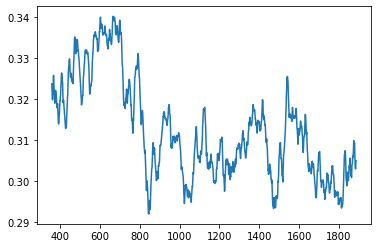

In [13]:
import pandas as pd

# Convert numpy array to pandas Series
obs_ds_series = pd.Series(cfs)

# # Apply a rolling mean (smooth) with a window size of 30
smoothed_obs_ds = obs_ds_series.rolling(window=360).mean()

# plot this with a smoothing of 30
fig, ax = plt.subplots()
plt.plot(smoothed_obs_ds)

In [15]:
# %%time

# # Form the wind power dataframe
wind_power_df = lw_func.form_wind_power_dataframe(
    cfs=cfs,
    ds=obs_ds,
    country_name=country_name,
)

In [17]:
wind_power_df.head()

,United_Kingdom_wind_power
1960-11-01,0.748669
1960-11-02,0.826100
1960-11-03,0.598949
1960-11-04,0.453127
1960-11-05,0.289524


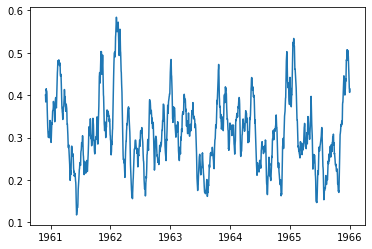

In [19]:
# plot the wind power data with a smoothing of 30
smooth30 = wind_power_df["United_Kingdom_wind_power"].rolling(window=30).mean()

# plot this with a smoothing of 30
fig, ax = plt.subplots()

plt.plot(smooth30)

### Loading model data ###

Now that we have loaded the obs data, we now want to load the model data and process this into 100m wind speeds before converting to wind power.